# Absolute Estimates of Protein Concentration in Xenopus

### Chirag Kumar - 11.02.2021

### This script uses the normalization method for estimating absolute protein concentrations in the Xenopus egg.

## Prep Workspace

### Import and Set-up Packages: Python and R

In [425]:
# python packages
# standard packages
import pandas as pd # for dataframes
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import matplotlib as mpl # for matplotlib settings
import os # for directories
import scipy as sp # for numerical processes and optimizations
import re

# for machine learning and stats
import statsmodels.api as sm # for statistical models and GLMs

In [426]:
# # configure R
# %load_ext rpy2.ipython

In [427]:
# %%R -r 200
# # get necessary R packages
# library(ggplot2)
# library(ggridges)
# library(RColorBrewer)
# library(grDevices)
# # change ggplot default theme to be black and white
# ggplot2::theme_set(theme_bw())

In [428]:
# configure plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]
font = {'family' : 'Nimbus Roman',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

In [429]:
seed = 108

### Define Directories

In [430]:
# define directories

# this is a hack to be able to refer to relative locations
if '__file__' not in globals():
    __file__ = '.'

inp_dir = os.path.abspath(os.path.dirname(__file__))
data_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                        'Data'))
out_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                       'Result Files'))
fig_dir = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                          'Figures'))

### Get Data

In [431]:
# peptide data from allosaurus
peps = pd.read_csv(os.path.join(data_dir, 'Xenopus-v9p2-proteins_11-06-2023-Area.csv'))

In [432]:
peps[peps['Protein ID'].str.contains('gnl|gene15410|rna44977', regex = False)]

,Reference,Protein ID,z,Pept. Length,Peptide,Trimmed Peptide,Stripped Peptide,Area,Max,Max Sn,...,occurences,num_theoretical_peps,Protein_id_2,theoretical_trypsin<=50aa,theoretical_trypsin<30aa,Description,theoretical_trypsin+lysC<30aa,theoretical_trypsin+lysC<=50aa,theoretical_lysC<30aa,theoretical_lysC<=50aa
42068,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,2,15,KADLAVTVPDTLTTWKT,ADLAVTVPDTLTTWK,ADLAVTVPDTLTTWK,9.623000e+08,39350000.0,82.2000,...,2,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42069,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,3,15,KADLAVTVPDTLTTWKT,ADLAVTVPDTLTTWK,ADLAVTVPDTLTTWK,2.848000e+06,1614000.0,6.1661,...,2,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42070,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,2,14,RAGPNGCFSEVVSTKI,AGPNGCFSEVVSTK,AGPNGCFSEVVSTK,3.999000e+08,14300000.0,37.8000,...,1,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42071,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,2,17,KANRITHDFSVEEYVLPKY,ANRITHDFSVEEYVLPK,ANRITHDFSVEEYVLPK,1.451000e+08,9692000.0,64.9000,...,3,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42072,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,3,17,KANRITHDFSVEEYVLPKY,ANRITHDFSVEEYVLPK,ANRITHDFSVEEYVLPK,7.034000e+08,43980000.0,317.7000,...,3,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42073,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,4,17,KANRITHDFSVEEYVLPKY,ANRITHDFSVEEYVLPK,ANRITHDFSVEEYVLPK,2.159000e+08,13320000.0,158.1000,...,3,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42074,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,2,12,KATVSNYLSQTIRV,ATVSNYLSQTIR,ATVSNYLSQTIR,6.550000e+07,4108000.0,26.8000,...,1,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42075,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,3,10,KDSVCEEINHRA,DSVCEEINHR,DSVCEEINHR,8.396000e+07,6382000.0,19.5000,...,2,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42076,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,2,10,KDSVCEEINHRA,DSVCEEINHR,DSVCEEINHR,8.991000e+07,12110000.0,43.7000,...,2,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60
42077,gnl|gene15410|rna44977|,gnl|gene15410|rna44977|,4,24,KDSVCEEINHRAGPNGCFSEVVSTKI,DSVCEEINHRAGPNGCFSEVVSTK,DSVCEEINHRAGPNGCFSEVVSTK,2.537000e+07,2996000.0,17.7000,...,1,NaN,gnl|gene15410|rna44977| pzp-like.2.L,76,66,NAN,114,136,48,60


In [433]:
max(peps['Stripped Peptide'].apply(len))

97

In [434]:
peps[peps['Stripped Peptide'].apply(len) == 97]

,Reference,Protein ID,z,Pept. Length,Peptide,Trimmed Peptide,Stripped Peptide,Area,Max,Max Sn,...,occurences,num_theoretical_peps,Protein_id_2,theoretical_trypsin<=50aa,theoretical_trypsin<30aa,Description,theoretical_trypsin+lysC<30aa,theoretical_trypsin+lysC<=50aa,theoretical_lysC<30aa,theoretical_lysC<=50aa
193298,gnl|gene42416|rna85309|,gnl|gene42416|rna85309|,12,98,BM*FCNTDRPGANGDPCSHVGNGQETIGRSRLEIIHSSTTMGRYLI...,M*FCNTDRPGANGDPCSHVGNGQETIGRSRLEIIHSSTTMGRYLIM...,MFCNTDRPGANGDPCSHVGNGQETIGRSRLEIIHSSTTMGRYLIML...,356300.0,356300.0,4.0318,...,1,NaN,gnl|gene42416|rna85309| LOC108719599,224,207,NAN,342,386,135,162


In [435]:
peps.shape

(197667, 25)

In [436]:
peps.Area.describe()

count    1.976670e+05
mean     1.198098e+09
std      8.898460e+09
min      0.000000e+00
25%      1.676000e+07
50%      6.746000e+07
75%      3.063000e+08
max      1.041000e+12
Name: Area, dtype: float64

In [437]:
peps.head()

,Reference,Protein ID,z,Pept. Length,Peptide,Trimmed Peptide,Stripped Peptide,Area,Max,Max Sn,...,occurences,num_theoretical_peps,Protein_id_2,theoretical_trypsin<=50aa,theoretical_trypsin<30aa,Description,theoretical_trypsin+lysC<30aa,theoretical_trypsin+lysC<=50aa,theoretical_lysC<30aa,theoretical_lysC<=50aa
0,gnl|gene15050|rna43914|,gnl|gene15050|rna43914|,3,23,RAAAAADLANNSPESNAVQDIEEKD,AAAAADLANNSPESNAVQDIEEK,AAAAADLANNSPESNAVQDIEEK,182300000.0,23810000.0,33.1,...,2,NaN,gnl|gene15050|rna43914| clpx.L,37,35,NAN,61,67,26,30
1,gnl|gene15050|rna43914|,gnl|gene15050|rna43914|,2,23,RAAAAADLANNSPESNAVQDIEEKD,AAAAADLANNSPESNAVQDIEEK,AAAAADLANNSPESNAVQDIEEK,173600000.0,22250000.0,30.3,...,2,NaN,gnl|gene15050|rna43914| clpx.L,37,35,NAN,61,67,26,30
2,gnl|gene15050|rna43914|,gnl|gene15050|rna43914|,4,21,KCELSISEDALRAIARLALERKT,CELSISEDALRAIARLALERK,CELSISEDALRAIARLALERK,2241000.0,359100.0,13.6,...,1,NaN,gnl|gene15050|rna43914| clpx.L,37,35,NAN,61,67,26,30
3,gnl|gene15050|rna43914|,gnl|gene15050|rna43914|,2,15,RDLIEFGM*IPEFVGRL,DLIEFGM*IPEFVGR,DLIEFGMIPEFVGR,1354000.0,556300.0,13.4,...,1,NaN,gnl|gene15050|rna43914| clpx.L,37,35,NAN,61,67,26,30
4,gnl|gene15050|rna43914|,gnl|gene15050|rna43914|,2,11,KEPESAAEAM*KL,EPESAAEAM*K,EPESAAEAMK,4272000.0,930400.0,26.6,...,1,NaN,gnl|gene15050|rna43914| clpx.L,37,35,NAN,61,67,26,30


In [438]:
peps = peps.drop(['concentration', 'num', 'occurences'], axis = 1)

In [439]:
# get protein mapping data
#protein_human_map = pd.read_excel(os.path.join(data_dir, '210113_xenla_v9p2_humanGN.xlsx'), sheet_name = 1)
protein_phrog_map = pd.read_excel(os.path.join(data_dir, '210216_xenla_v9p2_phrog.xlsx'), sheet_name = 1)

In [440]:
protein_phrog_map.head()

,ProteinId,laevisGene,Contigs,AA,E_LtoP,E_PtoL
0,gnl|gene10000|rna29070|,LOC495506.S,CL7211Contig1,MEVLTLLLSLLILLSIVLMSWRRHKKRLDLPPGPVPLPLLGNVLQG...,0.0,0.0
1,gnl|gene10001|rna29072|,prdm12.L,CL11856Contig1,MMGSVLPAEALVLKAGLKQPGLSLAELITSDILHSFLYGRWRNVLG...,0.0,0.0
2,gnl|gene10002|rna29075|,mmel1.L,CL6782Contig3,MENEVAKAVDNQMEKYIVTIMGKSESQMDIVEKSTKSAKKSWSFVE...,0.0,0.0
3,gnl|gene10003|rna29078|,clptm1l.S,CL8510Contig1,MLNRSSFTTLVVGVFIVYVVHTCWVMYGIVYTKPCESHSDNCIKPY...,0.0,0.0
4,gnl|gene10004|rna29080|,rftn1.L,CL15701Contig1,MGCGLNKLEKLDDKRPGNIYSTLKRPHVETKIDVAYEYKYVDFTTL...,0.0,0.0


In [441]:
phrog_map_hold = protein_phrog_map.copy(deep = True)

In [442]:
protein_phrog_map = protein_phrog_map[protein_phrog_map['E_LtoP'] <= 10 ** (-100)]

In [443]:
protein_phrog_map.sort_values(by = ['E_LtoP'], ascending = False)

,ProteinId,laevisGene,Contigs,AA,E_LtoP,E_PtoL
22348,gnl|gene38650|rna79885|,LOC108704530,dsrrswapns_comp210753_c3_seq1,MHNFLRTENSFCYLLLTLLADLKGSLQCDTEEKLFQKLLARYNHHI...,9.220000e-101,2.660000e-105
17598,gnl|gene31905|rna71425|,Xelaev18030486m,CL20104Contig1,MVLQPLVTQLDLFVIDTSHLLREINGLTLDSDCILVVLDVEALYMS...,9.100000e-101,4.280000e-101
12720,gnl|gene22920|rna62409|,Xelaev18022020m,CL5926Contig2,MVAKKNGLSDCTLESVWSVYDVLFCEKMHNFCLPTWATTNVLAKLK...,9.080000e-101,1.110000e-100
12755,gnl|gene22991|rna62482|,Xelaev18004113m,dsrrswapns_comp216157_c1_seq5,CKTVVWLLGHSYVSRAQRRAAVKKRHGRQLGFPEGRISIQWFGFPG...,8.580000e-101,7.380000e-101
13550,gnl|gene24504|rna63999|,Xelaev18012767m,CL1629Contig2,MGIFPNSQTNCTCYLLFLRWEMPARAIYNAFLSQDTESILRLSGGH...,8.300000e-101,5.860000e-101
...,...,...,...,...,...,...
11285,gnl|gene20405|rna59607|,mgea5.L,CL63Contig15,MVQKDGQATAAITEEETEAAPTTLAPELTPPATTGEDTDTETETCC...,0.000000e+00,0.000000e+00
11284,gnl|gene20404|rna59605|,dcaf4.L,CL5799Contig1,MGPKRENNRNWNRKYQGRRFHQRFPSEASQSSTESNIMDRTSSASS...,0.000000e+00,0.000000e+00
11282,gnl|gene20402|rna59599|,peli2.S,dsrrswapns_comp209386_c6_seq5,MFSPDQENHPAKAPVKYGELIVLGYNGALPNGDRGRRKSRFALLKR...,0.000000e+00,0.000000e+00
11281,gnl|gene20401|rna59598|,insm1.S,dsrrswapns_comp212818_c6_seq9,MPKGFLVKRSRKSPPVSYRVREEEEETRGGWMILATLCPSGGAPPP...,0.000000e+00,0.000000e+00


In [444]:
# get concentration data from deep proteomics paper
protein_conc = pd.read_excel(os.path.join(data_dir,
                                        'NIHMS607488-supplement-02--XenopusProteinConcentrationEstimates.xlsx'))

In [445]:
protein_conc

,Protein ID,Gene Symbol (human),Description (human),PSMs,summed ion current (A.U.),# theoretical peptides,normalized ion current,Estimated Protein Concentration (nM)
0,CL13623Contig1,SERPINA1,Alpha-1-antitrypsin,5880,2.250780e+07,45,500173.333333,17674.015875
1,CL20716Contig1,ACTG1,"Actin, cytoplasmic 2",3951,1.057270e+07,29,364575.862069,14398.991193
2,CL1514Contig1,ENO1,Alpha-enolase,4651,1.355090e+07,40,338772.500000,13730.023453
3,CL2685Contig1,TPI1,Triosephosphate isomerase,2173,8.309680e+06,31,268054.193548,11796.968828
4,BF611742,ACTA2,ACTA2 protein (Fragment),140,7.128510e+05,3,237617.000000,10910.543215
...,...,...,...,...,...,...,...,...
11084,CL5245Contig2,TTK,Dual specificity protein kinase TTK,1,3.188790e+00,94,0.033923,0.399448
11085,CL7399Contig1,RPGR,X-linked retinitis pigmentosa GTPase regulator,1,1.532630e+00,66,0.023222,0.312452
11086,CL10598Contig1,FSCN2,Fascin-2,1,7.803030e-01,35,0.022294,0.304308
11087,CL12915Contig1,ABCB1,Multidrug resistance protein 1,1,1.775560e+00,103,0.017238,0.257587


### Link Datasets

In [446]:
metric = 'Area'

In [447]:
peps = peps.sort_values(by = ['Protein ID', 'Peptide', 'z', metric])

In [448]:
peps['unique'] = (~peps.duplicated(subset = ['Protein ID', 'Stripped Peptide'],
                                keep = 'first')).astype(int)

In [449]:
# make normalized ion signal per protein
peps['Protein ID-v9p2'] = peps['Protein ID']
normalized_signal = peps[['Protein ID-v9p2', metric, 'unique']].groupby('Protein ID-v9p2').sum()

In [450]:
normalized_signal.columns = ['Area', 'unique']

In [451]:
ee1 = peps.copy(deep = True)

In [452]:
ee1 = peps.copy(deep = True)
ee1.index = ee1['Protein ID-v9p2']
normalized_signal['unique'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_trypsin+lysC<=50aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_trypsin+lysC<=50aa'].values

In [453]:
normalized_signal['theoretical_trypsin+lysC<30aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_trypsin+lysC<30aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_trypsin+lysC<30aa'].values

normalized_signal['theoretical_trypsin<30aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_trypsin<30aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_trypsin<30aa'].values

normalized_signal['theoretical_lysC<30aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_lysC<30aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_lysC<30aa'].values

normalized_signal['theoretical_trypsin+lysC<=50aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_trypsin+lysC<=50aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_trypsin+lysC<=50aa'].values

normalized_signal['theoretical_trypsin<=50aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_trypsin<=50aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_trypsin<=50aa'].values

normalized_signal['theoretical_lysC<=50aa'] = pd.DataFrame(ee1.loc[normalized_signal.index.values,
                     'theoretical_lysC<=50aa']).reset_index().drop_duplicates().reset_index(drop = True)['theoretical_lysC<=50aa'].values

In [454]:
normalized_signal['normalized'] = normalized_signal.Area / normalized_signal.unique

In [455]:
normalized_signal.head()

,Area,unique,theoretical_trypsin+lysC<30aa,theoretical_trypsin<30aa,theoretical_lysC<30aa,theoretical_trypsin+lysC<=50aa,theoretical_trypsin<=50aa,theoretical_lysC<=50aa,normalized
Protein ID-v9p2,,,,,,,,,
gnl|gene10000|rna29070|,1.079934e+09,48,43,28,15,48,29,19,2.249862e+07
gnl|gene10003|rna29078|,3.498500e+08,50,40,24,16,50,27,23,6.997000e+06
gnl|gene10006|rna29084|,3.224039e+10,104,100,52,48,104,53,51,3.100037e+08
gnl|gene1000|rna2937|,3.683500e+09,9,9,4,5,9,4,5,4.092778e+08
gnl|gene10010|rna29095|,5.719500e+07,11,8,6,2,11,9,2,5.199545e+06


In [456]:
normalized_signal.shape

(10319, 9)

In [457]:
ff1 = protein_phrog_map.copy(deep = True)

In [458]:
ff1 = ff1.sort_values(by = ['E_PtoL'], ascending = True)

In [459]:
ff1.shape

(27450, 6)

In [460]:
ff1 = ff1.drop_duplicates(subset = ['Contigs'], keep = 'first')

In [461]:
ff1.shape

(21234, 6)

In [462]:
ff1 = ff1.set_index('Contigs')

In [463]:
cc1 = protein_conc.copy(deep = True)

In [464]:
#cc1 = cc1.drop_duplicates(subset = ['Protein ID'], keep = False)

In [465]:
cc1 = cc1.set_index('Protein ID')

In [466]:
cc1.shape

(11089, 7)

In [467]:
gg1 = ff1.join(cc1).dropna(axis = 0).reset_index()

In [468]:
gg1 = gg1.set_index('ProteinId')

In [469]:
gg1.shape

(6773, 12)

In [470]:
gg1.head()

,Contigs,laevisGene,AA,E_LtoP,E_PtoL,Gene Symbol (human),Description (human),PSMs,summed ion current (A.U.),# theoretical peptides,normalized ion current,Estimated Protein Concentration (nM)
ProteinId,,,,,,,,,,,,
gnl|gene10000|rna29070|,CL7211Contig1,LOC495506.S,MEVLTLLLSLLILLSIVLMSWRRHKKRLDLPPGPVPLPLLGNVLQG...,0.0,0.0,CYP2A13,Cytochrome P450 2A13,9.0,225.5080,41.0,5.500195,10.805628
gnl|gene41572|rna84064|,CL2035Contig2,drosha.S,MSLHSGRGGPGTPMQTFRPQNLRPTQLPQSSGQYCYDTQSTPPPTF...,0.0,0.0,DROSHA,Ribonuclease 3,35.0,3543.6800,88.0,40.269091,39.262686
gnl|gene41566|rna84059|,CL1747Contig1,snx17,MHFSIPETESRSSESGAQYLAYNIHVNGVLHCRVRYSQLLGLHEQL...,0.0,0.0,SNX17,Sorting nexin-17,17.0,414.9510,36.0,11.526417,17.453806
gnl|gene41560|rna84045|,CL949Contig1,LOC108696891,MVGENFLLGRECNKTCLCTVNGVVECKDFSCGPNAVCKVMDGVQKC...,0.0,0.0,FCGBP,IgGFc-binding protein,2.0,42.6877,253.0,0.168726,1.129720
gnl|gene41652|rna84155|,CL253Contig7,MGC130975,MTSVTLATSEWISFFKEAGIPAGPAVNYAVTFVDNRIQKSMLMDLN...,0.0,0.0,C19ORF47,Uncharacterized protein C19orf47,2.0,39.4390,51.0,0.773314,3.030172


In [471]:
gg1 = gg1.join(normalized_signal).dropna(axis = 0).reset_index()

Text(0, 0.5, 'New Normalized Signal (log10)')

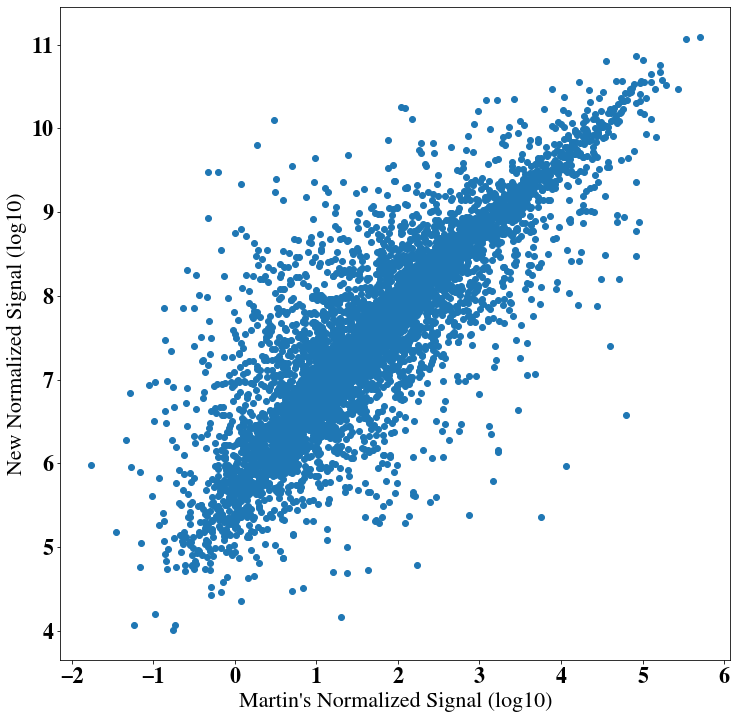

In [472]:
plt.scatter(np.log10(gg1['normalized ion current']), np.log10(gg1['normalized']))
plt.xlabel("Martin's Normalized Signal (log10)")
plt.ylabel('New Normalized Signal (log10)')

In [473]:
gg1['signal difference'] = np.log10(gg1['normalized ion current']) - np.log10(gg1['normalized']) - np.mean(np.log10(gg1['normalized ion current']) - np.log10(gg1['normalized']))

In [474]:
gg1.sort_values(by = 'signal difference', ascending = True)

,ProteinId,Contigs,laevisGene,AA,E_LtoP,E_PtoL,Gene Symbol (human),Description (human),PSMs,summed ion current (A.U.),...,Area,unique,theoretical_trypsin+lysC<30aa,theoretical_trypsin<30aa,theoretical_lysC<30aa,theoretical_trypsin+lysC<=50aa,theoretical_trypsin<=50aa,theoretical_lysC<=50aa,normalized,signal difference
4745,gnl|gene19844|rna57956|,dsrrswapns_comp209426_c0_seq1,rab27a.L,MRNRNRESSYDGPTSFPGLMSVTLSGHQPNFKMSDGDYDYLIKFLA...,0.000000e+00,0.000000e+00,RAB27A,Ras-related protein Rab-27A,1.0,1.092960e+01,...,7.471219e+10,25.0,24.0,15.0,9.0,25.0,15.0,10.0,2.988488e+09,-3.984968
13,gnl|gene41512|rna83982|,CL22656Contig1,LOC733413,MLCIIVLGPFLHWASRCKAISLYQASASSSMASASSHREVISLHVG...,0.000000e+00,0.000000e+00,TUBA1A,Tubulin alpha-1A chain,2.0,2.170930e+01,...,1.287903e+11,43.0,38.0,24.0,14.0,43.0,27.0,16.0,2.995124e+09,-3.870230
1781,gnl|gene9517|rna27679|,CL14546Contig1,eef2.2.L,MVNFTVDQIRTIMDKKSNIRNMSVIAHVDHGKSTLTDSLVCKAGII...,0.000000e+00,0.000000e+00,EEF2,Elongation factor 2,8.0,1.932480e+02,...,1.034625e+12,82.0,78.0,43.0,35.0,82.0,45.0,37.0,1.261738e+10,-3.800588
1421,gnl|gene7697|rna22474|,CL4954Contig1,prdx4.L,MCCGCSLLYDVPLLIMALQLRRYLRGSPAVTLCLLLLSAAAVTCEE...,0.000000e+00,0.000000e+00,PRDX4,Peroxiredoxin-4,5.0,3.924560e+01,...,1.443893e+11,23.0,22.0,16.0,6.0,23.0,16.0,7.0,6.277796e+09,-3.712629
5742,gnl|gene5047|rna14748|,CF547730,cox4i2.L,MLSAFHLRSALLPRIRLLGAASIRAAHSHEGQVSRSDGSELLYYDH...,1.480000e-130,1.210000e-130,COX4I2,"Cytochrome c oxidase subunit 4 isoform 2, mito...",4.0,2.260830e+01,...,4.299384e+10,20.0,20.0,12.0,8.0,20.0,12.0,8.0,2.149692e+09,-3.443255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,gnl|gene38195|rna79255|,CL28Contig16,krt5.1b,IREINLKNGFGFVEFDDHRDADDAVYELNGKVLCSERVTIEHARNH...,3.520000e-167,3.230000e-167,SRSF4,Serine/arginine-rich splicing factor 4,23.0,3.574940e+03,...,1.298000e+06,21.0,21.0,12.0,9.0,21.0,12.0,9.0,6.180952e+04,3.253601
5924,gnl|gene50249|rna96648|,zeinaSSns_comp383799_c0_seq5,LOC108717084,MIRFLLLFSRQGKLRLQKWYVTLPDKEKRKITRELVQIILSRNPKM...,4.070000e-112,3.860000e-112,AP1S3,AP-1 complex subunit sigma-3,4.0,1.119780e+04,...,4.050000e+06,17.0,16.0,9.0,7.0,17.0,9.0,8.0,2.382353e+05,3.309642
719,gnl|gene3552|rna10337|,CL105Contig9,calr3.L,MWWCLLMAAALMAVSADPLIYFREQFEDGDEWQKRWTESKNKSDFG...,0.000000e+00,0.000000e+00,CALR,Calreticulin,618.0,4.961820e+05,...,3.574000e+07,39.0,32.0,20.0,12.0,39.0,23.0,16.0,9.164103e+05,3.913689
493,gnl|gene45585|rna90036|,CL3418Contig2,LOC108706049,MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYM...,0.000000e+00,0.000000e+00,GAPDH,Glyceraldehyde-3-phosphate dehydrogenase,2002.0,2.037840e+06,...,1.131830e+08,30.0,30.0,16.0,14.0,30.0,16.0,14.0,3.772767e+06,4.027603


In [475]:
fit_ = sm.OLS(endog = np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0],
       exog = sm.add_constant(np.log10(gg1['normalized'][gg1['normalized'] != 0])),
       hasconst = True).fit()

In [476]:
fit_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Estimated Protein Concentration (nM)   R-squared:                       0.711
Model:                                              OLS   Adj. R-squared:                  0.711
Method:                                   Least Squares   F-statistic:                 1.514e+04
Date:                                  Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                                          23:11:20   Log-Likelihood:                -2885.6
No. Observations:                                  6160   AIC:                             5775.
Df Residuals:                                      6158   BIC:                             5789.
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4104      0.033    -72.186      0.000      -2.476      -2.345
normalized     0.5411      0.004    123.025      0.000       0.532       0.550
==============================================================================
Omnibus:                      796.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6761.372
Skew:                          -0.328   Prob(JB):                         0.00
Kurtosis:                       8.090   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
fit_ = sm.QuantReg(endog = np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0],
       exog = sm.add_constant(np.log10(gg1['normalized'][gg1['normalized'] != 0])),
       hasconst = True).fit(q=0.5)

In [478]:
fit_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  QuantReg Regression Results                                   
================================================================================================
Dep. Variable:     Estimated Protein Concentration (nM)   Pseudo R-squared:               0.5628
Model:                                         QuantReg   Bandwidth:                     0.05601
Method:                                   Least Squares   Sparsity:                       0.4624
Date:                                  Mon, 06 Nov 2023   No. Observations:                 6160
Time:                                          23:11:20   Df Residuals:                     6158
                                                          Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7253      0.020   -136.466      0.000      -2.764      -2.686
normalized     0.5847      0.003    222.284      0.000       0.580       0.590
==============================================================================
"""

In [479]:
dir(sm.robust.norms)

['AndrewWave',
 'Hampel',
 'HuberT',
 'LeastSquares',
 'RamsayE',
 'RobustNorm',
 'TrimmedMean',
 'TukeyBiweight',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'estimate_location',
 'np']

In [480]:
mm1 = pd.concat([np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0],
           (3*np.log10(gg1['normalized'][gg1['normalized'] != 0])).round()/3], axis = 1).groupby('normalized').median().reset_index()

In [481]:
mm1

,normalized,Estimated Protein Concentration (nM)
0,4.000000,0.065120
1,4.333333,0.521858
2,4.666667,0.359598
3,5.000000,0.368570
4,5.333333,0.556166
5,5.666667,0.659549
6,6.000000,0.862078
7,6.333333,0.993953
8,6.666667,1.180474
9,7.000000,1.331605


In [482]:
fit_ = sm.RLM(endog = mm1['Estimated Protein Concentration (nM)'],
       exog = sm.add_constant(mm1['normalized']),
       hasconst = True,
       M = sm.robust.norms.TrimmedMean(1.65)).fit()

In [483]:
fit_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Robust linear Model Regression Results                             
================================================================================================
Dep. Variable:     Estimated Protein Concentration (nM)   No. Observations:                   22
Model:                                              RLM   Df Residuals:                       20
Method:                                            IRLS   Df Model:                            1
Norm:                                       TrimmedMean                                         
Scale Est.:                                         mad                                         
Cov Type:                                            H1                                         
Date:                                  Mon, 06 Nov 2023                                         
Time:                                          23:11:20                                         
No. Iterations:                                       5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9223      0.100    -29.240      0.000      -3.118      -2.726
normalized     0.6215      0.013     48.462      0.000       0.596       0.647
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

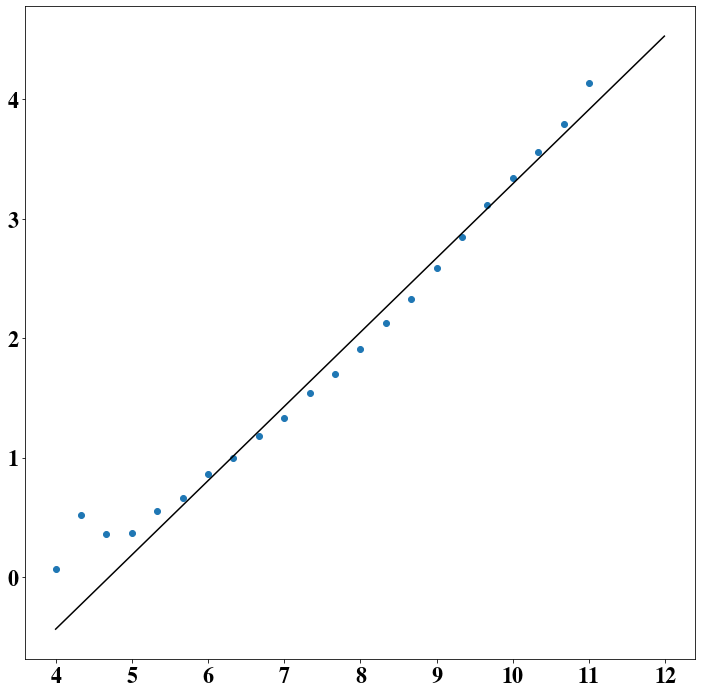

In [484]:
plt.scatter(mm1['normalized'], mm1['Estimated Protein Concentration (nM)'])
plt.plot(np.arange(4, 12, 0.01), fit_.predict(sm.add_constant(np.arange(4, 12, 0.01))), c = 'k')

In [485]:
# fit_ = sm.RLM(endog = np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0],
#        exog = sm.add_constant(np.log10(gg1['normalized'][gg1['normalized'] != 0])),
#        hasconst = True,
#        M = sm.robust.norms.TrimmedMean(1.37)).fit()

In [486]:
# fit_.summary()

Text(0, 0.5, 'Estimated Protein Concentration (nM) (log10)')

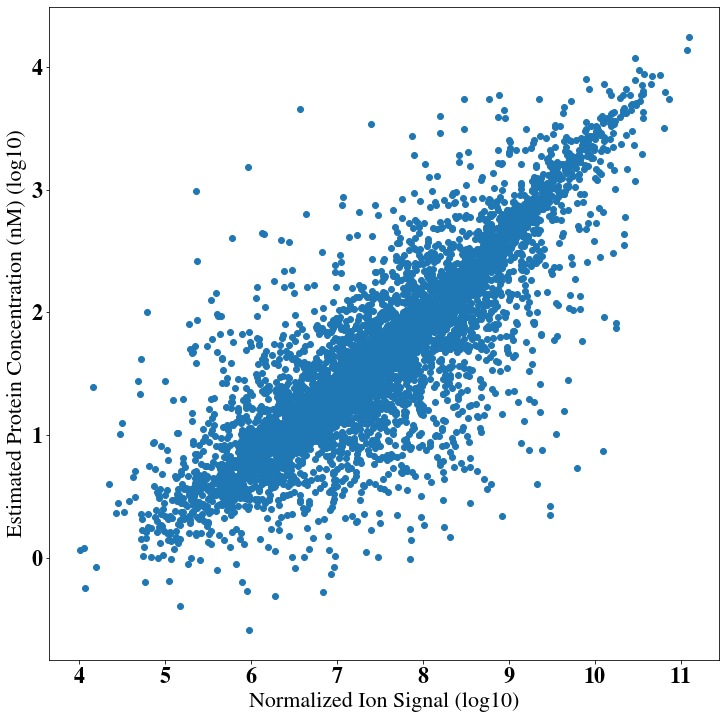

In [487]:
plt.scatter(np.log10(gg1['normalized'][gg1['normalized'] != 0]),
            np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0])
plt.xlabel('Normalized Ion Signal (log10)')
plt.ylabel('Estimated Protein Concentration (nM) (log10)')

In [488]:
xx1 = np.log10(gg1['normalized'][gg1['normalized'] != 0])

In [489]:
yy1 = np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0]

In [490]:
xx2 = np.arange(4, 11, 0.01)
yy2 = fit_.predict(sm.add_constant(np.arange(4, 11, 0.01)))

In [491]:
zzz = fit_.predict(sm.add_constant(xx1))

In [492]:
fit_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Robust linear Model Regression Results                             
================================================================================================
Dep. Variable:     Estimated Protein Concentration (nM)   No. Observations:                   22
Model:                                              RLM   Df Residuals:                       20
Method:                                            IRLS   Df Model:                            1
Norm:                                       TrimmedMean                                         
Scale Est.:                                         mad                                         
Cov Type:                                            H1                                         
Date:                                  Mon, 06 Nov 2023                                         
Time:                                          23:11:21                                         
No. Iterations:                                       5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9223      0.100    -29.240      0.000      -3.118      -2.726
normalized     0.6215      0.013     48.462      0.000       0.596       0.647
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [493]:
fold_error = np.power(10, yy1 - zzz)
fold_error = np.log2(fold_error)

In [494]:
np.mean(fold_error)

-0.30653277666401363

In [495]:
np.median(np.abs(fold_error))

0.5224330865228477

In [496]:
np.mean(np.abs(fold_error))

0.8757321911870949

In [497]:
rr1 = gg1.copy(deep = True)

In [498]:
rr1['resid'] = gg1['Estimated Protein Concentration (nM)'].values - np.power(10, fit_.predict(sm.add_constant(np.log10(gg1['normalized'][gg1['normalized'] != 0]))).values)

In [499]:
rr1['fold_error'] = fit_.predict(sm.add_constant(np.log10(rr1['normalized'][rr1['normalized'] != 0]))).values - np.log10(rr1['Estimated Protein Concentration (nM)'])

In [500]:
rr1 = rr1.rename(columns = {'unique' : 'theoretical_num'})

In [501]:
rr1 = rr1.set_index(['ProteinId'])

In [502]:
#rr1 = rr1.join(pd.DataFrame(peps['Protein ID'].value_counts()))
rr1 = rr1.join(peps[['Protein ID', 'unique']].groupby('Protein ID').sum())

In [503]:
rr1 = rr1.rename(columns = {'unique' : 'num_detected'})

In [504]:
rr1['frac_detected'] = rr1['num_detected'] / rr1['theoretical_num']

In [505]:
sp.stats.pearsonr(np.log10(gg1['normalized'][gg1['normalized'] != 0]),
           np.log10(gg1['Estimated Protein Concentration (nM)'])[gg1['normalized'] != 0])

(0.8430895087837323, 0.0)

In [506]:
normalized_signal['Estimated Concentration (nM)'] = 0
normalized_signal['Estimated Concentration (nM)'] += np.power(10, fit_.predict(sm.add_constant(np.log10(normalized_signal['normalized']))))

In [507]:
human_gene_map = pd.read_excel(os.path.join(data_dir, '210113_xenla_v9p2_humanGN.xlsx'), sheet_name = 1)

In [508]:
human_gene_map = human_gene_map.sort_values(by = ['humanGene', 'E_LtoH'], ascending = True)

In [509]:
human_gene_map['Top Hit Forward = Top Hit Reverse'] = human_gene_map.ProteinId.values == human_gene_map.sort_values(by = ['humanGene',
                                                                                                                          'E_HtoL'],
                                                                                                                    ascending = True).ProteinId.values

In [510]:
human_gene_map['Top Hit Forward = Top Hit Reverse'] = human_gene_map['Top Hit Forward = Top Hit Reverse'].astype(int)

In [511]:
human_gene_map['Top Hit Forward = Top Hit Reverse'] *= (1 - human_gene_map.E_HtoL.duplicated(keep = False).astype(int))

In [512]:
human_gene_map[human_gene_map.humanGene == 'A2M']

,ProteinId,laevisGene,human,humanGene,description,AA,E_LtoH,E_HtoL,Top Hit Forward = Top Hit Reverse
5715,gnl|gene15410|rna44977|,pzp-like.2.L,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MWSSALALCLLFTALPGGDAAPPDPQYMLLVPTVLHGGGEEKFCLL...,0.000000e+00,0.000000e+00,0
7288,gnl|gene16891|rna49367|,ovos2.L,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MSPNRFLLCVCILGLIAGGAAKVQYALTIPALLKSGETQRACVNLI...,0.000000e+00,0.000000e+00,0
27556,gnl|gene50021|rna96284|,a2m.S,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MWSSALAFCLLLTAFPGGDSAPPHPKYMLLVPTVLHGGSEEKFCLL...,0.000000e+00,0.000000e+00,0
30448,gnl|gene7104|rna20743|,a2m.L,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MWSSALALCLLFTALPGGDAALPDPKYMLLVPTVLHCGSEEKFCLL...,0.000000e+00,0.000000e+00,0
3120,gnl|gene12961|rna37674|,LOC108696037,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MSPRGLLLCLSLLGIIAGGASKPQYALSIPALLKSGETATACINFV...,2.800000e-135,7.233333e-16,0
20809,gnl|gene41339|rna83741|,LOC108696028,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MKQLCIDIYIQYTGSREKSNMALVEVKLLSGFIPLKNSVKKLVNSN...,1.980000e-34,1.700000e-33,0
14905,gnl|gene32732|rna72256|,LOC100491357.S,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MFQRRFLCWVPILGLIGGVVSKPQHAFSIPFVLNKGKNTTACINFL...,1.040000e-33,3.130001e-08,0
17795,gnl|gene37448|rna78175|,LOC108695710,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MLESINGNGGIHWERTNKPNAEKYPFFYAPAPSPEIEITAYILWGL...,5.960000e-33,4.020000e-32,0
16152,gnl|gene35331|rna75279|,LOC108697328,sp|P01023|A2MG_HUMAN,A2M,Alpha-2-macroglobulin,MLYNSEGHDSLNEFHSFVHFHWPLTSCLYCSYNGIKNQSNMAVVDM...,1.260000e-18,1.000000e-17,0


In [513]:
human_gene_map.to_excel(os.path.join(data_dir, 'Xenopus-v9p2_HumanGenes-map.xlsx'),
                        index = False)

In [514]:
human_gene_map = human_gene_map.set_index('ProteinId')

In [515]:
normalized_signal = normalized_signal.join(human_gene_map)

In [516]:
normalized_signal = normalized_signal.reset_index()

In [517]:
tt1 = normalized_signal.copy(deep = True)

In [518]:
normalized_signal = normalized_signal[normalized_signal.laevisGene.notna()]

In [519]:
normalized_signal['Top Hit Forward = Top Hit Reverse'].value_counts()

0.0    6586
1.0    3551
Name: Top Hit Forward = Top Hit Reverse, dtype: int64

In [520]:
tt2 = tt1[tt1.laevisGene.isna()][['Protein ID-v9p2', 'Area', 'unique', 'normalized',
                                  'Estimated Concentration (nM)', 'E_HtoL',
                                  'Top Hit Forward = Top Hit Reverse']]
tt2 = tt2.set_index('Protein ID-v9p2')
tt3 = pd.read_excel(os.path.join(data_dir, '210113_xenla_v9p2_humanGN.xlsx'),
                             sheet_name = 2).set_index('ProteinId')
tt2 = tt2.join(tt3)

In [521]:
tt2 = tt2.reset_index()

In [522]:
tt2 = tt2[['Protein ID-v9p2', 'Area', 'unique', 'normalized', 'Estimated Concentration (nM)',
          'laevisGene', 'human', 'humanGene', 'description', 'AA', 'E_LtoH', 'E_HtoL',
           'Top Hit Forward = Top Hit Reverse']]

In [523]:
normalized_signal = pd.concat([normalized_signal, tt2], axis = 0)

In [524]:
normalized_signal = normalized_signal[['Protein ID-v9p2', 'laevisGene', 'human', 'humanGene', 'description',
                                      'AA', 'E_LtoH', 'Top Hit Forward = Top Hit Reverse',
                                       'Area', 'unique',
                                       'theoretical_trypsin+lysC<30aa',
                                       #'theoretical_trypsin+lysC<=50aa', # comment this out bc it is 'unique'
                                       'theoretical_trypsin<30aa',
                                       'theoretical_lysC<30aa',
                                       'theoretical_trypsin<=50aa',
                                       'theoretical_lysC<=50aa',
                                       'normalized',
                                       'Estimated Concentration (nM)']]

In [525]:
normalized_signal = normalized_signal.rename(columns = {'Area' : 'Total Area Signal (ions)',
                                                       'unique' : '# of Theoretical Peptides (Trypsin + LysC) <= 50 AA',
                                                       'theoretical_trypsin+lysC<30aa' : '# of Theoretical Peptides (Trypsin + LysC) < 30 AA',
                                                       'theoretical_trypsin<30aa' : '# of Theoretical Peptides (Trypsin) < 30 AA',
                                                       'theoretical_lysC<30aa' : '# of Theoretical Peptides (LysC) < 30 AA',
                                                       'theoretical_trypsin<=50aa' : '# of Theoretical Peptides (Trypsin) <= 50 AA',
                                                       'theoretical_lysC<=50aa' : '# of Theoretical Peptides (LysC) <= 50 AA',
                                                       'normalized' : 'Normalized Area Signal (ions / peptide)',
                                                       'human' : 'Protein ID-human',
                                                       'description' : 'Protein Description (human)',
                                                       'laevisGene' : 'Laevis Gene Name',
                                                       'humanGene' : 'Human Gene Name',
                                                       'Protein ID-v9p2' : 'Protein ID-Laevis v9p2',
                                                       'AA' : 'Protein Sequence (Laevis)',
                                                       'Estimated Concentration (nM)' : 'Estimated Protein Concentration (nM)'})

In [526]:
normalized_signal = normalized_signal.sort_values(by = 'Estimated Protein Concentration (nM)', ascending = False)

In [527]:
normalized_signal.head()

,Protein ID-Laevis v9p2,Laevis Gene Name,Protein ID-human,Human Gene Name,Protein Description (human),Protein Sequence (Laevis),E_LtoH,Top Hit Forward = Top Hit Reverse,Total Area Signal (ions),# of Theoretical Peptides (Trypsin + LysC) <= 50 AA,# of Theoretical Peptides (Trypsin + LysC) < 30 AA,# of Theoretical Peptides (Trypsin) < 30 AA,# of Theoretical Peptides (LysC) < 30 AA,# of Theoretical Peptides (Trypsin) <= 50 AA,# of Theoretical Peptides (LysC) <= 50 AA,Normalized Area Signal (ions / peptide),Estimated Protein Concentration (nM)
4062,gnl|gene19662|rna57471|,serpina6.L,tr|A0A024R6I7|A0A024R6I7_HUMAN,SERPINA1,Alpha-1-antitrypsin,MHLLVYLSLFFALALASVTEISLDNKHRHRHEQQGHHDSAKHGHQK...,4.100000e-87,0.0,6.542843e+12,53,51.0,27.0,24.0,28.0,25.0,1.234499e+11,9365.218779
1835,gnl|gene14337|rna41761|,eno1.L,sp|P06733|ENOA_HUMAN,ENO1,Alpha-enolase,MSIKNIHAREIFDSRGNPTVEVDLYTCKGLFRAAVPSGASTGIYEA...,0.000000e+00,0.0,5.024281e+12,43,40.0,21.0,19.0,22.0,21.0,1.168437e+11,9050.495353
4165,gnl|gene19900|rna58110|,act3.S,sp|P68133|ACTS_HUMAN,ACTA1,"Actin, alpha skeletal muscle",MCDDDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVM...,0.000000e+00,0.0,3.795172e+12,35,32.0,19.0,13.0,20.0,15.0,1.084335e+11,8639.892915
8512,gnl|gene54|rna164|,LOC100101274,sp|Q8WWU7|ITLN2_HUMAN,ITLN2,Intelectin-2,MLVYILLLLVVGGLSQPCSKSWEPLVMVASKNLANQLGCDKENTFR...,6.980000e-138,1.0,2.311308e+12,32,27.0,17.0,10.0,18.0,14.0,7.222837e+10,6711.726767
7770,gnl|gene4780|rna13948|,gapdh.L,sp|P04406|G3P_HUMAN,GAPDH,Glyceraldehyde-3-phosphate dehydrogenase,MAKVGINGFGRIGRLVTRAAFMSGKVQVVAINDPFIDLDYMVYMFK...,0.000000e+00,0.0,2.134578e+12,33,31.0,17.0,14.0,18.0,15.0,6.468417e+10,6266.952913


In [528]:
normalized_signal['Estimated Protein Concentration (nM)'].sum()

1949958.0057301472

In [529]:
normalized_signal['Top Hit Forward = Top Hit Reverse'].value_counts()

0.0    6586
1.0    3551
Name: Top Hit Forward = Top Hit Reverse, dtype: int64

In [530]:
normalized_signal.to_excel(os.path.join(data_dir, 'XenopusProteinConcentrationEstimates.xlsx'), index = False)

In [531]:
normalized_signal = normalized_signal.dropna(axis = 0)

In [532]:
normalized_signal

,Protein ID-Laevis v9p2,Laevis Gene Name,Protein ID-human,Human Gene Name,Protein Description (human),Protein Sequence (Laevis),E_LtoH,Top Hit Forward = Top Hit Reverse,Total Area Signal (ions),# of Theoretical Peptides (Trypsin + LysC) <= 50 AA,# of Theoretical Peptides (Trypsin + LysC) < 30 AA,# of Theoretical Peptides (Trypsin) < 30 AA,# of Theoretical Peptides (LysC) < 30 AA,# of Theoretical Peptides (Trypsin) <= 50 AA,# of Theoretical Peptides (LysC) <= 50 AA,Normalized Area Signal (ions / peptide),Estimated Protein Concentration (nM)
4062,gnl|gene19662|rna57471|,serpina6.L,tr|A0A024R6I7|A0A024R6I7_HUMAN,SERPINA1,Alpha-1-antitrypsin,MHLLVYLSLFFALALASVTEISLDNKHRHRHEQQGHHDSAKHGHQK...,4.100000e-87,0.0,6.542843e+12,53,51.0,27.0,24.0,28.0,25.0,1.234499e+11,9365.218779
1835,gnl|gene14337|rna41761|,eno1.L,sp|P06733|ENOA_HUMAN,ENO1,Alpha-enolase,MSIKNIHAREIFDSRGNPTVEVDLYTCKGLFRAAVPSGASTGIYEA...,0.000000e+00,0.0,5.024281e+12,43,40.0,21.0,19.0,22.0,21.0,1.168437e+11,9050.495353
4165,gnl|gene19900|rna58110|,act3.S,sp|P68133|ACTS_HUMAN,ACTA1,"Actin, alpha skeletal muscle",MCDDDETTALVCDNGSGLVKAGFAGDDAPRAVFPSIVGRPRHQGVM...,0.000000e+00,0.0,3.795172e+12,35,32.0,19.0,13.0,20.0,15.0,1.084335e+11,8639.892915
8512,gnl|gene54|rna164|,LOC100101274,sp|Q8WWU7|ITLN2_HUMAN,ITLN2,Intelectin-2,MLVYILLLLVVGGLSQPCSKSWEPLVMVASKNLANQLGCDKENTFR...,6.980000e-138,1.0,2.311308e+12,32,27.0,17.0,10.0,18.0,14.0,7.222837e+10,6711.726767
7770,gnl|gene4780|rna13948|,gapdh.L,sp|P04406|G3P_HUMAN,GAPDH,Glyceraldehyde-3-phosphate dehydrogenase,MAKVGINGFGRIGRLVTRAAFMSGKVQVVAINDPFIDLDYMVYMFK...,0.000000e+00,0.0,2.134578e+12,33,31.0,17.0,14.0,18.0,15.0,6.468417e+10,6266.952913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,gnl|gene7642|rna22280|,ddx54.L,sp|Q8TDD1|DDX54_HUMAN,DDX54,ATP-dependent RNA helicase DDX54,MAQKKRKAQRSRKCCQRQDSDDSDKGEFRVKAAPQKDDGVHLPAFP...,0.000000e+00,0.0,3.971000e+05,80,73.0,45.0,28.0,45.0,35.0,4.963750e+03,0.237035
7144,gnl|gene44512|rna88473|,LOC108713473,sp|Q9HC84|MUC5B_HUMAN,MUC5B,Mucin-5B,MGTFKGIPLWILPLFLGQLNAQLYIEEIEGSSSGEYLIHETIQNHT...,0.000000e+00,0.0,1.372800e+06,471,403.0,226.0,177.0,253.0,218.0,2.914650e+03,0.170254
7745,gnl|gene47681|rna92909|,LOC108719625,sp|P08217|CEL2A_HUMAN,CELA2A,Chymotrypsin-like elastase family member 2A,MASKRLSSLESVLIALFVLMTCACIGLIVVCFLEKPKSSEAEGSNG...,3.550000e-61,1.0,1.834000e+05,73,62.0,39.0,23.0,44.0,29.0,2.512329e+03,0.155239
8068,gnl|gene4954|rna14480|,hfm1.L,sp|A2PYH4|HFM1_HUMAN,HFM1,Probable ATP-dependent DNA helicase HFM1,MEMSVDSLHSLDGLFSDGPKDKNVLQKEELTMWLKASAPDIAEIPH...,0.000000e+00,0.0,2.923376e+05,158,150.0,80.0,70.0,81.0,77.0,1.850238e+03,0.128360


In [533]:
grouped_signal = normalized_signal.groupby('Human Gene Name').sum().reset_index()[['Human Gene Name',
                                                                  'Total Area Signal (ions)',
                                                                 '# of Theoretical Peptides (Trypsin + LysC) <= 50 AA',
                                                                 '# of Theoretical Peptides (Trypsin + LysC) < 30 AA',
                                                                 '# of Theoretical Peptides (Trypsin) <= 50 AA',
                                                                 '# of Theoretical Peptides (LysC) <= 50 AA',
                                                                 '# of Theoretical Peptides (Trypsin) < 30 AA',
                                                                 '# of Theoretical Peptides (LysC) < 30 AA',
                                                                 'Normalized Area Signal (ions / peptide)',
                                                                 'Estimated Protein Concentration (nM)']]

In [534]:
grouped_signal = grouped_signal.rename(columns = {'Estimated Protein Concentration (nM)' : 'Estimated Concentration (nM)'})

In [535]:
grouped_signal = grouped_signal.sort_values(by = 'Estimated Concentration (nM)', ascending = False)

In [536]:
grouped_signal.head()

,Human Gene Name,Total Area Signal (ions),# of Theoretical Peptides (Trypsin + LysC) <= 50 AA,# of Theoretical Peptides (Trypsin + LysC) < 30 AA,# of Theoretical Peptides (Trypsin) <= 50 AA,# of Theoretical Peptides (LysC) <= 50 AA,# of Theoretical Peptides (Trypsin) < 30 AA,# of Theoretical Peptides (LysC) < 30 AA,Normalized Area Signal (ions / peptide),Estimated Concentration (nM)
2586,HBZ,2.107645e+12,94,89.0,52.0,42.0,50.0,39.0,1.148575e+11,14636.105283
5485,SERPINA1,6.784501e+12,181,169.0,95.0,86.0,92.0,77.0,1.288436e+11,11291.891712
1921,ENO1,5.416528e+12,84,78.0,42.0,42.0,40.0,38.0,1.264107e+11,10961.074217
2278,GAPDH,3.223105e+12,96,92.0,52.0,44.0,50.0,42.0,9.767018e+10,10404.888313
3926,NME2,2.021997e+12,43,41.0,23.0,20.0,21.0,20.0,9.259318e+10,10119.966894


In [537]:
grouped_signal.to_excel(os.path.join(data_dir, 'XenopusProteinConcentrationEstimatesGroupedByGene.xlsx'),
                        index = False)